Loading data from: anaphoric_ambiguity_spanbert_input.csv
Loaded 827 samples

K-FOLD CROSS-VALIDATION WITH 5 FOLDS

PREPROCESSING DATA FOR CLASSIFICATION
Preprocessing complete. Created 267 instances.
Class distribution:
is_ambiguous
0    153
1    114
Name: count, dtype: int64
Class balance: is_ambiguous
0    0.573034
1    0.426966
Name: proportion, dtype: float64

FOLD 1/5
Train size: 213
Val size: 54
Train class distribution:
is_ambiguous
0    122
1     91
Name: count, dtype: int64
Val class distribution:
is_ambiguous
0    31
1    23
Name: count, dtype: int64


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at SpanBERT/spanbert-base-cased and are newly initialized: ['classifier.bias', 'bert.pooler.dense.weight', 'classifier.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Training fold 1...
Epoch 5/30: Train Loss=0.6188, Val Loss=0.7374, Val F1=0.6471
Early stopping at epoch 8

Fold 1 complete. Best F1: 0.6667

FOLD 2/5
Train size: 213
Val size: 54
Train class distribution:
is_ambiguous
0    122
1     91
Name: count, dtype: int64
Val class distribution:
is_ambiguous
0    31
1    23
Name: count, dtype: int64


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at SpanBERT/spanbert-base-cased and are newly initialized: ['classifier.bias', 'bert.pooler.dense.weight', 'classifier.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Training fold 2...
Epoch 5/30: Train Loss=0.6111, Val Loss=0.7702, Val F1=0.6349
Epoch 10/30: Train Loss=0.5054, Val Loss=0.6754, Val F1=0.6400
Early stopping at epoch 11

Fold 2 complete. Best F1: 0.6452

FOLD 3/5
Train size: 214
Val size: 53
Train class distribution:
is_ambiguous
0    122
1     92
Name: count, dtype: int64
Val class distribution:
is_ambiguous
0    31
1    22
Name: count, dtype: int64


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at SpanBERT/spanbert-base-cased and are newly initialized: ['classifier.bias', 'bert.pooler.dense.weight', 'classifier.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Training fold 3...
Epoch 5/30: Train Loss=0.6749, Val Loss=0.7144, Val F1=0.5867
Epoch 10/30: Train Loss=0.6177, Val Loss=0.6003, Val F1=0.6667
Epoch 15/30: Train Loss=0.4719, Val Loss=0.6259, Val F1=0.6792
Epoch 20/30: Train Loss=0.3754, Val Loss=0.6753, Val F1=0.6792
Early stopping at epoch 23

Fold 3 complete. Best F1: 0.7143

FOLD 4/5
Train size: 214
Val size: 53
Train class distribution:
is_ambiguous
0    123
1     91
Name: count, dtype: int64
Val class distribution:
is_ambiguous
0    30
1    23
Name: count, dtype: int64


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at SpanBERT/spanbert-base-cased and are newly initialized: ['classifier.bias', 'bert.pooler.dense.weight', 'classifier.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Training fold 4...
Epoch 5/30: Train Loss=0.5974, Val Loss=0.8865, Val F1=0.6769
Epoch 10/30: Train Loss=0.4315, Val Loss=0.9762, Val F1=0.6441
Early stopping at epoch 10

Fold 4 complete. Best F1: 0.6769

FOLD 5/5
Train size: 214
Val size: 53
Train class distribution:
is_ambiguous
0    123
1     91
Name: count, dtype: int64
Val class distribution:
is_ambiguous
0    30
1    23
Name: count, dtype: int64


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at SpanBERT/spanbert-base-cased and are newly initialized: ['classifier.bias', 'bert.pooler.dense.weight', 'classifier.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Training fold 5...
Epoch 5/30: Train Loss=0.5804, Val Loss=0.6194, Val F1=0.4706
Early stopping at epoch 7

Fold 5 complete. Best F1: 0.6567

CROSS-VALIDATION RESULTS
Mean F1 across folds: 0.6720 ± 0.0236
Fold 1: F1 = 0.6667
Fold 2: F1 = 0.6452
Fold 3: F1 = 0.7143
Fold 4: F1 = 0.6769
Fold 5: F1 = 0.6567

Plotting results from best fold (Fold 3)


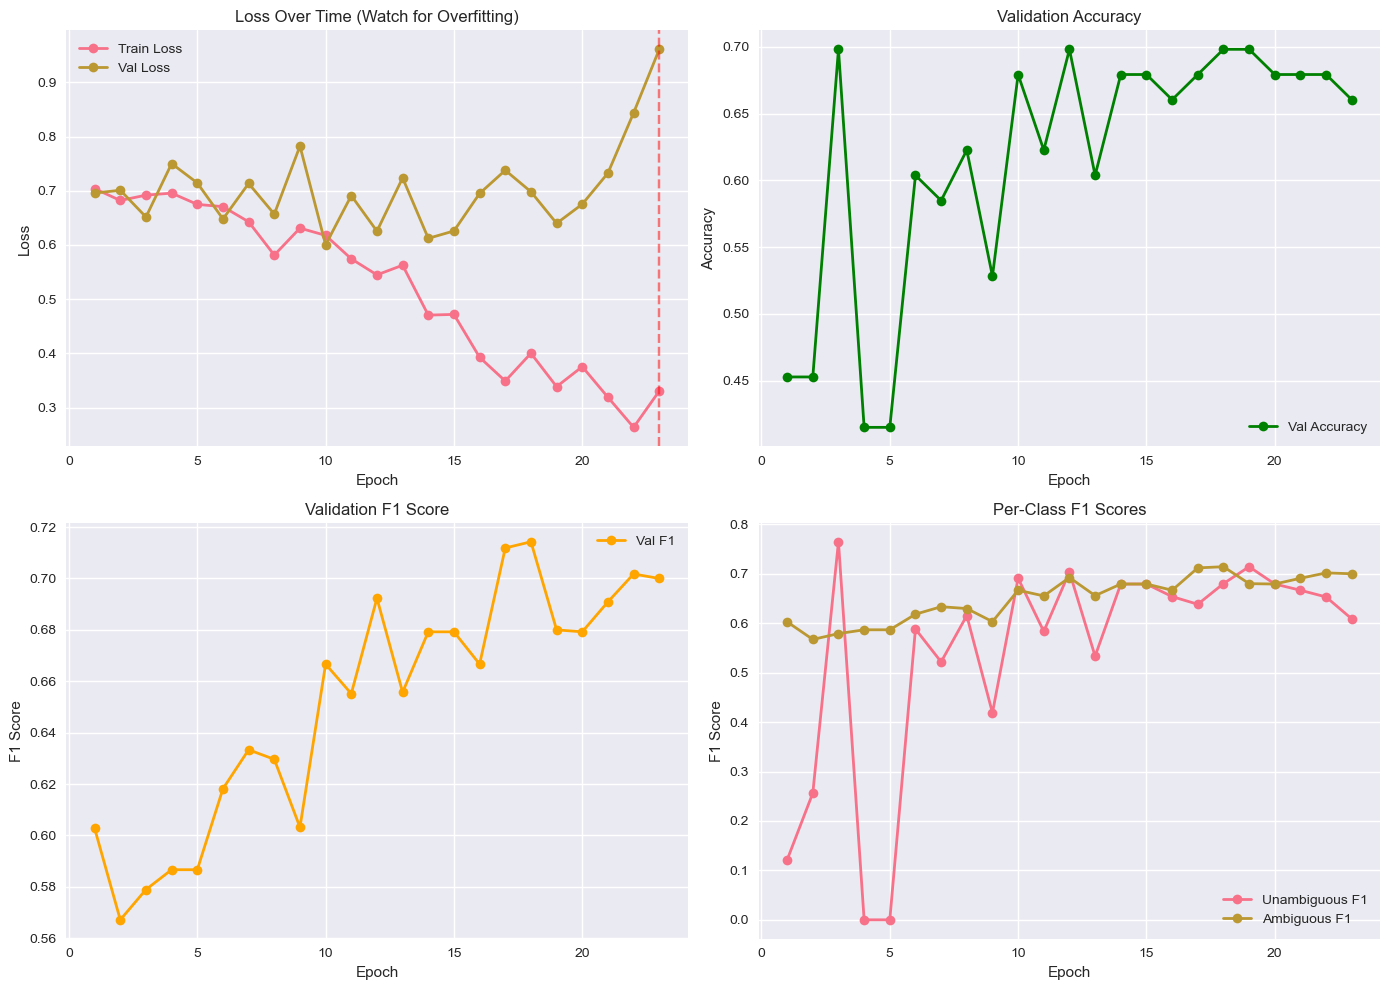

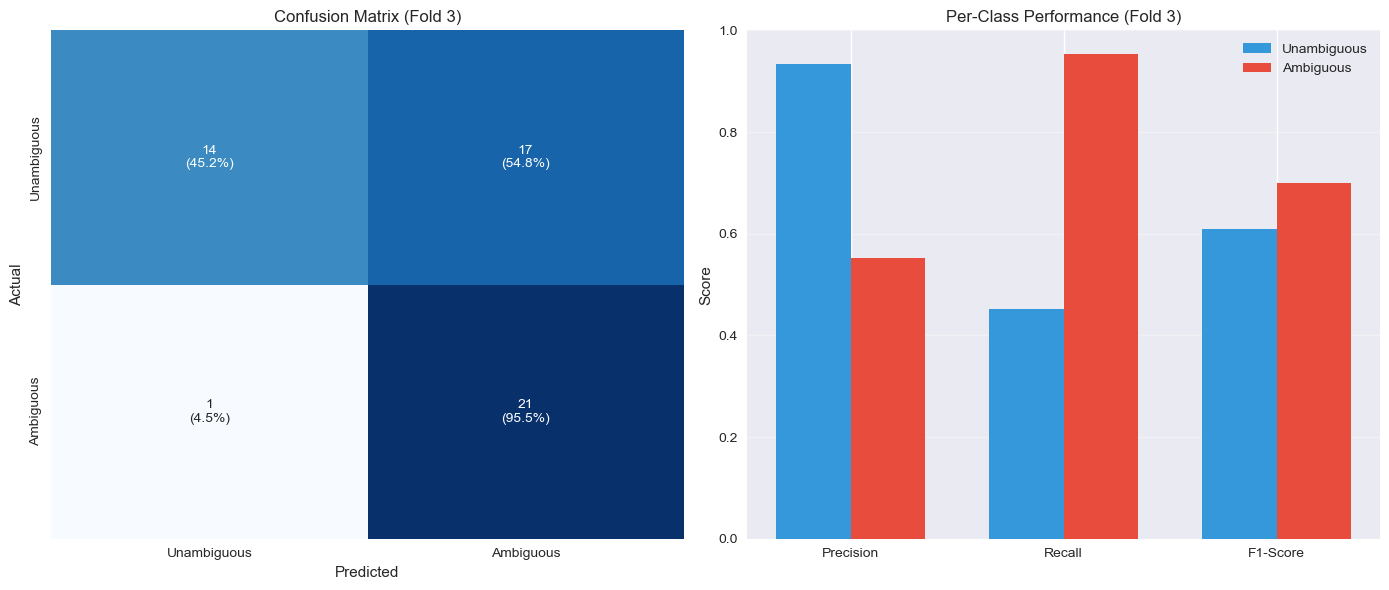


CLASSIFICATION REPORT (Fold 3)
              precision    recall  f1-score   support

 Unambiguous     0.9333    0.4516    0.6087        31
   Ambiguous     0.5526    0.9545    0.7000        22

    accuracy                         0.6604        53
   macro avg     0.7430    0.7031    0.6543        53
weighted avg     0.7753    0.6604    0.6466        53


Support per class: Unambiguous=31, Ambiguous=22

IMPORTANT RECOMMENDATIONS
1. Your dataset is very small (267 samples) for fine-tuning
2. Consider data augmentation or few-shot learning approaches
3. Try freezing BERT layers and only training classifier
4. Consider using a smaller model (DistilBERT, MiniLM)
5. Or use prompt-based approaches with GPT-4

PIPELINE COMPLETE


In [1]:
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import get_linear_schedule_with_warmup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (confusion_matrix, classification_report,
                             precision_recall_fscore_support, accuracy_score)
from sklearn.model_selection import StratifiedKFold
import warnings

warnings.filterwarnings('ignore')

# -------------------------
# Config / Hyperparameters
# -------------------------
DATA_PATH = "anaphoric_ambiguity_spanbert_input.csv"
MODEL_DIR = "./spanbert_anaphora_classification_final"
BATCH_SIZE = 8  # Smaller for tiny dataset
MAX_LENGTH = 128
NUM_EPOCHS = 30
LR = 3e-5  # Higher learning rate
WARMUP_RATIO = 0.0  # No warmup for tiny dataset
RANDOM_SEED = 42
EARLY_STOPPING_PATIENCE = 5  # Aggressive early stopping
GRAD_CLIP_NORM = 1.0
DROPOUT_RATE = 0.3  # Increased dropout
WEIGHT_DECAY = 0.1  # Stronger regularization

# Use K-fold cross validation instead of single split
USE_KFOLD = True
N_FOLDS = 5

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Reproducibility
torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(RANDOM_SEED)

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# -------------------------
# Data / Dataset
# -------------------------

def preprocess_for_classification(df):
    """
    Preprocesses data for binary classification.
    """
    print("\n" + "="*60)
    print("PREPROCESSING DATA FOR CLASSIFICATION")
    print("="*60)

    df['group_id'] = df['Id'].apply(lambda x: '-'.join(x.split('-')[:2]))

    classification_data = []

    for group_id, group_df in df.groupby('group_id'):
        context = group_df['Hashed_Context'].iloc[0]
        pronoun = group_df['Pronoun'].iloc[0]
        
        is_ambiguous = 0 if group_df['Manual Evaluation'].iloc[0] == 'UA' else 1
        
        # Simpler format - just pronoun and context
        text = f"{pronoun}: {context}"
        
        classification_data.append({
            'group_id': group_id,
            'text': text,
            'pronoun': pronoun,
            'context': context,
            'is_ambiguous': is_ambiguous
        })

    class_df = pd.DataFrame(classification_data)
    print(f"Preprocessing complete. Created {len(class_df)} instances.")
    print(f"Class distribution:\n{class_df['is_ambiguous'].value_counts()}")
    print(f"Class balance: {class_df['is_ambiguous'].value_counts(normalize=True)}")
    return class_df

class AnaphoraClassificationDataset(Dataset):
    """
    Dataset for binary classification of anaphoric ambiguity.
    """
    def __init__(self, dataframe, tokenizer, max_length=128):
        self.data = dataframe.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        
        # Simpler encoding
        encoding = self.tokenizer(
            row['text'],
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        item = {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(row['is_ambiguous'], dtype=torch.long),
        }
        return item

# -------------------------
# Model with Dropout Override
# -------------------------
class ClassificationModelWithDropout(nn.Module):
    """Wrapper to add more aggressive dropout"""
    def __init__(self, base_model, dropout_rate=0.3):
        super().__init__()
        self.base_model = base_model
        self.dropout = nn.Dropout(dropout_rate)
        
    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.base_model.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)  # Extra dropout
        logits = self.base_model.classifier(pooled_output)
        
        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits, labels)
        
        return type('Output', (), {'loss': loss, 'logits': logits})()

# -------------------------
# Evaluation
# -------------------------
def evaluate_model(model, dataloader, device):
    """
    Evaluation function for classification model.
    """
    model.eval()
    all_preds = []
    all_labels = []
    all_probs = []
    total_loss = 0.0

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(
                input_ids=input_ids, 
                attention_mask=attention_mask,
                labels=labels
            )
            
            total_loss += outputs.loss.item()
            logits = outputs.logits
            probs = torch.softmax(logits, dim=1)
            preds = torch.argmax(logits, dim=1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    avg_loss = total_loss / len(dataloader)
    return np.array(all_preds), np.array(all_labels), avg_loss, np.array(all_probs)

def calculate_metrics(y_true, y_pred):
    """
    Calculate comprehensive metrics.
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(
        y_true, y_pred, average='binary', pos_label=1, zero_division=0
    )
    
    # Also get per-class metrics
    precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(
        y_true, y_pred, average=None, zero_division=0
    )
    
    return {
        'accuracy': accuracy, 
        'precision': precision, 
        'recall': recall, 
        'f1': f1,
        'precision_per_class': precision_per_class,
        'recall_per_class': recall_per_class,
        'f1_per_class': f1_per_class,
        'support_per_class': support_per_class
    }

# -------------------------
# Plotting
# -------------------------
def plot_training_history(history):
    """Plot training and validation metrics."""
    epochs = range(1, len(history['train_loss']) + 1)
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Loss plot with both train and val
    axes[0, 0].plot(epochs, history['train_loss'], 'o-', label='Train Loss', linewidth=2)
    axes[0, 0].plot(epochs, history['val_loss'], 'o-', label='Val Loss', linewidth=2)
    axes[0, 0].set_xlabel('Epoch'); axes[0, 0].set_ylabel('Loss')
    axes[0, 0].set_title('Loss Over Time (Watch for Overfitting)')
    axes[0, 0].legend(); axes[0, 0].grid(True)
    
    # Highlight divergence
    if len(epochs) > 5:
        max_diff_idx = np.argmax(np.array(history['val_loss']) - np.array(history['train_loss']))
        axes[0, 0].axvline(x=max_diff_idx+1, color='red', linestyle='--', alpha=0.5, label='Max Divergence')

    axes[0, 1].plot(epochs, history['val_acc'], 'o-', color='green', label='Val Accuracy', linewidth=2)
    axes[0, 1].set_xlabel('Epoch'); axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].set_title('Validation Accuracy'); axes[0, 1].legend(); axes[0, 1].grid(True)

    axes[1, 0].plot(epochs, history['val_f1'], 'o-', color='orange', label='Val F1', linewidth=2)
    axes[1, 0].set_xlabel('Epoch'); axes[1, 0].set_ylabel('F1 Score')
    axes[1, 0].set_title('Validation F1 Score'); axes[1, 0].legend(); axes[1, 0].grid(True)

    # Per-class F1 if available
    if 'val_f1_class0' in history:
        axes[1, 1].plot(epochs, history['val_f1_class0'], 'o-', label='Unambiguous F1', linewidth=2)
        axes[1, 1].plot(epochs, history['val_f1_class1'], 'o-', label='Ambiguous F1', linewidth=2)
        axes[1, 1].set_xlabel('Epoch'); axes[1, 1].set_ylabel('F1 Score')
        axes[1, 1].set_title('Per-Class F1 Scores'); axes[1, 1].legend(); axes[1, 1].grid(True)

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix_and_metrics(y_true, y_pred, class_names=['Unambiguous', 'Ambiguous'], title_suffix=""):
    """Plot confusion matrix and metrics."""
    metrics = calculate_metrics(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Confusion matrix with percentages
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    annotations = [[f'{count}\n({pct:.1f}%)' for count, pct in zip(row_counts, row_pcts)] 
                   for row_counts, row_pcts in zip(cm, cm_percent)]
    
    sns.heatmap(cm, annot=np.array(annotations), fmt='',cmap='Blues',
                xticklabels=class_names, yticklabels=class_names, ax=ax1, cbar=False)
    ax1.set_xlabel('Predicted'); ax1.set_ylabel('Actual')
    ax1.set_title(f'Confusion Matrix{title_suffix}')

    # Per-class metrics
    metric_data = {
        'Unambiguous': [
            metrics['precision_per_class'][0],
            metrics['recall_per_class'][0],
            metrics['f1_per_class'][0]
        ],
        'Ambiguous': [
            metrics['precision_per_class'][1],
            metrics['recall_per_class'][1],
            metrics['f1_per_class'][1]
        ]
    }
    
    x = np.arange(3)
    width = 0.35
    
    ax2.bar(x - width/2, metric_data['Unambiguous'], width, label='Unambiguous', color='#3498db')
    ax2.bar(x + width/2, metric_data['Ambiguous'], width, label='Ambiguous', color='#e74c3c')
    
    ax2.set_ylabel('Score')
    ax2.set_title(f'Per-Class Performance{title_suffix}')
    ax2.set_xticks(x)
    ax2.set_xticklabels(['Precision', 'Recall', 'F1-Score'])
    ax2.legend()
    ax2.set_ylim(0, 1)
    ax2.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("\n" + "="*60)
    print(f"CLASSIFICATION REPORT{title_suffix}")
    print("="*60)
    print(classification_report(y_true, y_pred, target_names=class_names, digits=4, zero_division=0))
    print(f"\nSupport per class: Unambiguous={metrics['support_per_class'][0]}, Ambiguous={metrics['support_per_class'][1]}")

    return metrics

# -------------------------
# Training Loop
# -------------------------
def train_classification_model_kfold(
        df, n_folds=N_FOLDS, num_epochs=NUM_EPOCHS, batch_size=BATCH_SIZE,
        lr=LR, warmup_ratio=WARMUP_RATIO, model_dir=MODEL_DIR):
    """
    K-fold cross-validation training.
    """
    print("\n" + "="*60)
    print(f"K-FOLD CROSS-VALIDATION WITH {n_folds} FOLDS")
    print("="*60)
    
    class_df = preprocess_for_classification(df)
    
    # Initialize tokenizer once
    tokenizer = AutoTokenizer.from_pretrained("SpanBERT/spanbert-base-cased")
    
    # Store results from each fold
    fold_results = []
    
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=RANDOM_SEED)
    
    for fold, (train_idx, val_idx) in enumerate(skf.split(class_df, class_df['is_ambiguous'])):
        print("\n" + "="*60)
        print(f"FOLD {fold + 1}/{n_folds}")
        print("="*60)
        
        train_df = class_df.iloc[train_idx].reset_index(drop=True)
        val_df = class_df.iloc[val_idx].reset_index(drop=True)
        
        print(f"Train size: {len(train_df)}")
        print(f"Val size: {len(val_df)}")
        print(f"Train class distribution:\n{train_df['is_ambiguous'].value_counts()}")
        print(f"Val class distribution:\n{val_df['is_ambiguous'].value_counts()}")
        
        # Create datasets
        train_dataset = AnaphoraClassificationDataset(train_df, tokenizer, max_length=MAX_LENGTH)
        val_dataset = AnaphoraClassificationDataset(val_df, tokenizer, max_length=MAX_LENGTH)
        
        # Weighted sampling for class balance
        class_counts = train_df['is_ambiguous'].value_counts().sort_index().values
        class_weights = 1.0 / class_counts
        sample_weights = [class_weights[label] for label in train_df['is_ambiguous']]
        sampler = WeightedRandomSampler(sample_weights, len(sample_weights))
        
        train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler)
        val_loader = DataLoader(val_dataset, batch_size=batch_size)
        
        # Initialize model with dropout
        base_model = AutoModelForSequenceClassification.from_pretrained(
            "SpanBERT/spanbert-base-cased",
            num_labels=2,
            hidden_dropout_prob=DROPOUT_RATE,
            attention_probs_dropout_prob=DROPOUT_RATE
        )
        model = ClassificationModelWithDropout(base_model, dropout_rate=DROPOUT_RATE)
        model.to(DEVICE)
        
        # Class-weighted loss (ensure float32)
        class_weight = torch.tensor([1.0, class_counts[0]/class_counts[1]], dtype=torch.float32).to(DEVICE)
        
        optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=WEIGHT_DECAY)
        total_steps = len(train_loader) * num_epochs
        warmup_steps = int(total_steps * warmup_ratio)
        scheduler = get_linear_schedule_with_warmup(
            optimizer, num_warmup_steps=warmup_steps, num_training_steps=total_steps
        )
        
        best_f1 = 0.0
        patience_counter = 0
        history = {
            'train_loss': [], 'val_loss': [], 'val_acc': [], 
            'val_f1': [], 'val_f1_class0': [], 'val_f1_class1': []
        }
        
        print(f"\nTraining fold {fold + 1}...")
        
        for epoch in range(num_epochs):
            model.train()
            total_train_loss = 0.0
            
            for batch in train_loader:
                optimizer.zero_grad()
                
                outputs = model(
                    input_ids=batch['input_ids'].to(DEVICE),
                    attention_mask=batch['attention_mask'].to(DEVICE),
                    labels=batch['labels'].to(DEVICE)
                )
                
                # Apply class weights manually
                loss_fct = nn.CrossEntropyLoss(weight=class_weight)
                loss = loss_fct(outputs.logits, batch['labels'].to(DEVICE))
                
                loss.backward()
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=GRAD_CLIP_NORM)
                optimizer.step()
                scheduler.step()
                total_train_loss += loss.item()

            avg_train_loss = total_train_loss / len(train_loader)
            
            # Validation
            val_preds, val_labels, val_loss, val_probs = evaluate_model(model, val_loader, DEVICE)
            val_metrics = calculate_metrics(val_labels, val_preds)
            
            # Store history
            history['train_loss'].append(avg_train_loss)
            history['val_loss'].append(val_loss)
            history['val_acc'].append(val_metrics['accuracy'])
            history['val_f1'].append(val_metrics['f1'])
            history['val_f1_class0'].append(val_metrics['f1_per_class'][0])
            history['val_f1_class1'].append(val_metrics['f1_per_class'][1])

            if (epoch + 1) % 5 == 0:
                print(f"Epoch {epoch+1}/{num_epochs}: Train Loss={avg_train_loss:.4f}, Val Loss={val_loss:.4f}, Val F1={val_metrics['f1']:.4f}")

            # Early stopping
            if val_metrics['f1'] > best_f1:
                best_f1 = val_metrics['f1']
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= EARLY_STOPPING_PATIENCE:
                    print(f"Early stopping at epoch {epoch+1}")
                    break
        
        print(f"\nFold {fold + 1} complete. Best F1: {best_f1:.4f}")
        
        # Store fold results
        fold_results.append({
            'fold': fold + 1,
            'best_f1': best_f1,
            'val_preds': val_preds,
            'val_labels': val_labels,
            'history': history
        })
    
    # Aggregate results
    print("\n" + "="*60)
    print("CROSS-VALIDATION RESULTS")
    print("="*60)
    
    mean_f1 = np.mean([r['best_f1'] for r in fold_results])
    std_f1 = np.std([r['best_f1'] for r in fold_results])
    
    print(f"Mean F1 across folds: {mean_f1:.4f} ± {std_f1:.4f}")
    
    for result in fold_results:
        print(f"Fold {result['fold']}: F1 = {result['best_f1']:.4f}")
    
    # Plot best fold
    best_fold_idx = np.argmax([r['best_f1'] for r in fold_results])
    best_fold = fold_results[best_fold_idx]
    
    print(f"\nPlotting results from best fold (Fold {best_fold['fold']})")
    plot_training_history(best_fold['history'])
    plot_confusion_matrix_and_metrics(
        best_fold['val_labels'], 
        best_fold['val_preds'],
        title_suffix=f" (Fold {best_fold['fold']})"
    )
    
    return fold_results, tokenizer


if __name__ == "__main__":
    print("Loading data from:", DATA_PATH)
    try:
        final_df = pd.read_csv(DATA_PATH)
        print(f"Loaded {len(final_df)} samples")
        
        if USE_KFOLD:
            results, tokenizer = train_classification_model_kfold(final_df)
        
        print("\n" + "="*60)
        print("IMPORTANT RECOMMENDATIONS")
        print("="*60)
        print("1. Your dataset is very small (267 samples) for fine-tuning")
        print("2. Consider data augmentation or few-shot learning approaches")
        print("3. Try freezing BERT layers and only training classifier")
        print("4. Consider using a smaller model (DistilBERT, MiniLM)")
        print("5. Or use prompt-based approaches with GPT-4")
        
    except FileNotFoundError:
        print(f"Error: Data file not found at {DATA_PATH}")

    print("\n" + "="*60)
    print("PIPELINE COMPLETE")
    print("="*60)